In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

import math
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

<h2>Test Power</h2>
<p>Recall our very first hypothesis test:<br/>
n = 15 voters, 4 favor your candidate<br/>
$H_0$: p = .5<br/>
$H_a$: p != .5<br/>

Consider the same model from example 1.  Our initial alternative hypothesis is that $p!=50\%$, however, we need to test against a specific alternative hypothesis.  Let's choose $p=40\%$, meaning that an alternate hypothesis is that our candidate has only 40% of the vote.  
</p> 


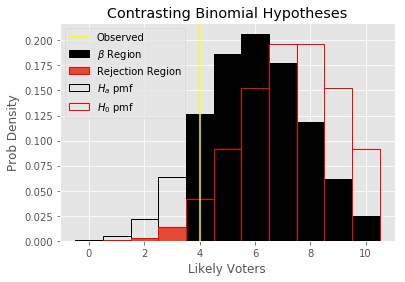

In [4]:
p_prime = .4
p_0 = .5
n = 15

fig, ax = plt.subplots(1, 1)
n, p = 15, 0.4
x = np.arange(0,11)
ax.bar(x[4:], stats.binom.pmf(x[4:], n, p_prime), 1, fill=True, lw=1, color='black', edgecolor='black', label=r'$\beta$ Region')
ax.bar(x[:4], stats.binom.pmf(x[:4], n, p_0), 1, fill=True, lw=1, edgecolor='red', label='Rejection Region')
ax.bar(x, stats.binom.pmf(x, n, p_prime), 1, fill=False, lw=1, edgecolor='black', label='$H_a$ pmf')
ax.bar(x, stats.binom.pmf(x, n, p_0), 1, fill=False, lw=1, edgecolor='red', label='$H_0$ pmf')
ax.axvline(4, color='yellow', label='Observed')
ax.set_title("Contrasting Binomial Hypotheses")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Likely Voters")
ax.legend(loc='upper left')
plt.show()

<p>We can clearly see that while our observation does not exist in the rejection region, this does effectively rule out negative outcomes for our candidate.  Let's look at how pronounced the effect is.</p>

In [5]:
# We want P(Binom(x, 15, .4) for 16 > x > 3)
# why x > 3?
total = 0
for i in range(4, 16):
    p_mass = stats.binom.pmf(i, n, p_prime)
    print("Probability for {0} observed is {1:.6f}".format(i, p_mass))
    total += p_mass
print("Total prob: {0:.2f}%\n".format(total*100))

# The survival function (1 -cdf) gives us this sum
print("False negative rate is {0:.2f}%, test power is: {1:.2f}: ".format(stats.binom.sf(3, n, p_prime)*100, 1-stats.binom.sf(3, n, p_prime)))

Probability for 4 observed is 0.126776
Probability for 5 observed is 0.185938
Probability for 6 observed is 0.206598
Probability for 7 observed is 0.177084
Probability for 8 observed is 0.118056
Probability for 9 observed is 0.061214
Probability for 10 observed is 0.024486
Probability for 11 observed is 0.007420
Probability for 12 observed is 0.001649
Probability for 13 observed is 0.000254
Probability for 14 observed is 0.000024
Probability for 15 observed is 0.000001
Total prob: 90.95%

False negative rate is 90.95%, test power is: 0.09: 


<p>In our initial test, we failed to reject the null hypothesis, but you can see that an alternate hypothesis that is bad for our candidate is also likely.  So we can see the power of our test is very poor.  The question is, how do we improve this error?  Is this a reasonable test?</p><br/><br/>
<h2>Looking at the power region</h2>
<p>Let's examine the effect of sample size, effect size, and significance on the power of a particular test.  We'll be generating a few plots to demonstrate power.</p>

In [6]:
def plot_power(n=100, alpha=.05, mu=0, mu2=1, std=1, one_tailed=True):
    """Plot a graphic showing the power of a hypothesis test.
    
    Useful to explore how power relates to sample size, effect size,
    significance, and standard deviation.
    """
    crit_val = stats.norm.ppf(1 - alpha) if one_tailed==True else stats.norm.ppf(1 - alpha/2)

    # Curve 1
    variance = std ** 2 / math.sqrt(n)
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 10 * sigma, mu + 10 * sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma), label ="$H_0$")

    # Curve 2, assuming the two curves have the same std
    plt.plot(x, mlab.normpdf(x, mu2, sigma), color="black", label="$H_a$")

    # Critical line
    plt.axvline(crit_val * sigma, color='yellow', label="Rej. Boundary")
    x3 = np.linspace(crit_val * sigma, 3, 100)
    plt.fill_between(x3, mlab.normpdf(x3, mu2, sigma), color='black', label="Power Region")
    plt.legend(loc='upper left')
    plt.figure(figsize=(20,10))

    power = 1 - stats.norm(mu2, sigma).cdf(crit_val * sigma)
    print("Power of the test is the area highlighted in red.")
    print("Significance: " + str(alpha))
    print("Rejection Boundary: " + str(crit_val*sigma))
    print("Effect Size: " + str(abs(mu - mu2)))
    print("Sample size: " + str(n))
    print("Standard Deviation: " + str(std))
    print("Power: " + str(power))
    plt.show()

Power of the test is the area highlighted in red.
Significance: 0.05
Rejection Boundary: 0.520148387876
Effect Size: 1
Sample size: 100
Standard Deviation: 1
Power: 0.935420170048


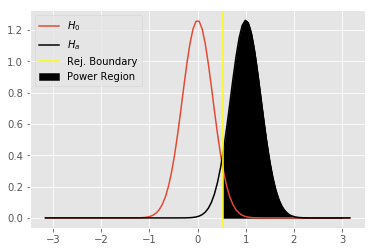

In [7]:
plot_power()

Power of the test is the area highlighted in red.
Significance: 0.05
Rejection Boundary: 0.619795032305
Effect Size: 1
Sample size: 100
Standard Deviation: 1
Power: 0.8853789898


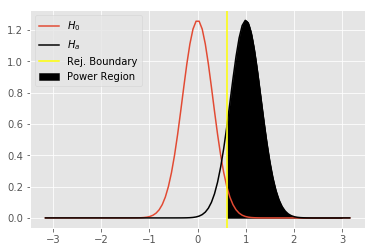

In [6]:
plot_power(one_tailed=False)

Power of the test is the area highlighted in red.
Significance: 0.05
Rejection Boundary: 0.520148387876
Effect Size: 1.3
Sample size: 100
Standard Deviation: 1
Power: 0.993170480075


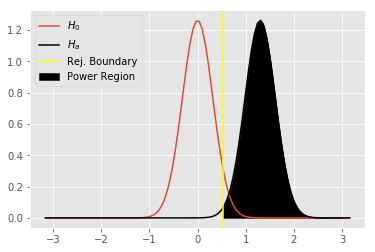

In [7]:
plot_power(mu2=1.3)

Power of the test is the area highlighted in red.
Significance: 0.05
Rejection Boundary: 0.437390914765
Effect Size: 1
Sample size: 200
Standard Deviation: 1
Power: 0.982816939473


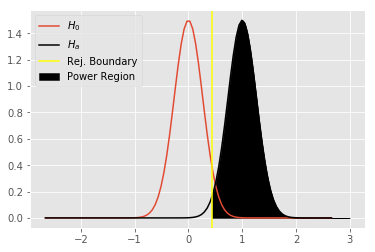

In [8]:
plot_power(n=200)

Power of the test is the area highlighted in red.
Significance: 0.05
Rejection Boundary: 0.276189457198
Effect Size: 0.5
Sample size: 1258
Standard Deviation: 1
Power: 0.908719266577


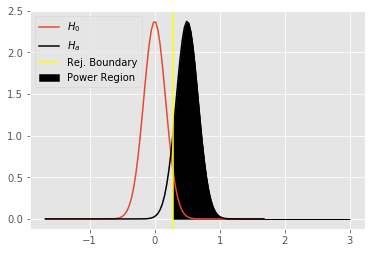

In [9]:
plot_power(n=1258, mu2=0.5)

<p>So we can see, that by increasing sample size, we are able to run tests that have reasonble test power AND can test alternate hypotheses that are fairly close to $H_0$.  Let's check directly how to find an appropriate sample size.</p><br/><br/>

<h2>Calculating N</h2>
<p>Suppose you want to test $H_0: \mu = \mu_0$ vs $H_a: \mu \gt \mu_0$ (i.e. a one tailed test).  We need to know two other numbers, the point where the rejection region begins (k) and the sample size (n).  Under these conditions, we can make the following statements:
$$ \alpha = P(\frac{\mu-\mu_0}{\sigma/\sqrt{n}} > \frac{k-\mu_0}{\sigma/\sqrt{n}} \text{ when } \mu = \mu_a) = P(Z > z_\alpha)$$

with Z as our Z statistic.  Similarly, we can state:
$$ \beta = P(\frac{\mu-\mu_a}{\sigma/\sqrt{n}} \le \frac{k-\mu_a}{\sigma/\sqrt{n}} \text{ when } \mu = \mu_a) = P(Z \le -z_\beta)$$

Hence, our critical points can be deduced:
$$ z_\alpha = \frac{k-\mu_0}{\sigma/\sqrt{n}} \text{   and } -z_\beta = \frac{k-\mu_a}{\sigma/\sqrt{n}}$$

We can solve each equation for k, and set them equal:
$$\mu_0 + z_\alpha\frac{\sigma}{\sqrt{n}} = \mu_a - z_\beta\frac{\sigma}{\sqrt{n}}$$
and solving for n:
$$n = (\frac{(z_\alpha + z_\beta)\sigma}{\mu_a - \mu_0})^2$$
<br/><br/>
Where do we get $z_\alpha$ and $z_\beta$ from?
</p>

In [11]:
alpha, beta = (.05, .05)
#ppf - percent point function, inverse of cdf
z_alpha = stats.norm.ppf(alpha)
z_beta = stats.norm.ppf(1-beta)
print(z_alpha, z_beta)

-1.64485362695 1.64485362695


In [12]:
.06*.94

0.05639999999999999